 # <ins>**Machine Learning Technologies</ins> - Task 3**: Backpropagation Algorithm

__ITMO University__, St. Petersburg, Russia
- Name    : Rahman, Rasyad Rifatan <br>
- ID      : 458029

---

Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule
data: bioresponse.csv

description from Kaggle:

*“The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”*


Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

1. Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.
2. For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?
3. Compare the accuracy of the models fitted with various BP algorithms.

---

### **The completed tasks are at the bottom of the pre-made code**

---

# Logistic Regression as a Neural Network
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Key steps:

  -Initialize the parameters of the model

  -Learn the parameters for the model by minimizing the cost  

  -Use the learned parameters to make predictions (on the test set)
  
  -Analyse the results and conclude

## Parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [15]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

In [16]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


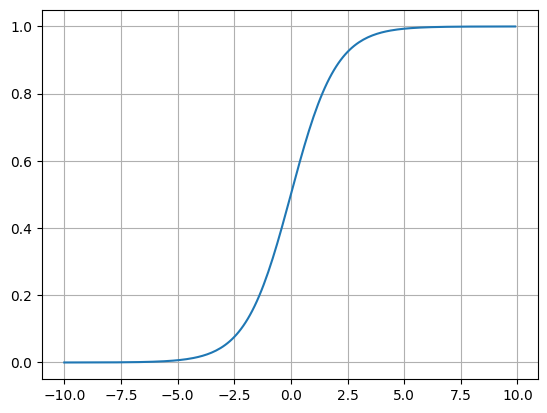

In [17]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))
plt.grid()
plt.show()

### Initializing parameters



In [18]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b

In [19]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [20]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [21]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [22]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [23]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 5000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
Cost after iteration 1000: 0.001541
Cost after iteration 1100: 0.001478
Cost after iteration 1200: 0.001421
Cost after iteration 1300: 0.001369
Cost after iteration 1400: 0.001321
Cost after iteration 1500: 0.001278
Cost after iteration 1600: 0.001238
Cost after iteration 1700: 0.001200
Cost after iteration 1800: 0.001166
Cost after iteration 1900: 0.001134
Cost after iteration 2000: 0.001104
Cost after iteration 2100: 0.001076
Cost after iteration 2200: 0.001050
Cost after iteration 2300: 0.001025
Cost after iteration 2400: 0.001002
Cost after iteration 2500: 0.000980
Cost after iteration 2600: 0.000959
Cost after iteration 2700: 0.000940
Cost

C:\Users\Rasyad\AppData\Local\Temp\ipykernel_20744\1509341831.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(i, cost))


Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`.

In [24]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [25]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [26]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/


---

### <ins>**Task**</ins>

**Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule**

---

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('bioresponse.csv')

In [29]:
# Data
X = df.drop('Activity', axis = 1)
X = X.values
print(X)

[[0.         0.49700901 0.1        ... 0.         0.         0.        ]
 [0.36666667 0.60629148 0.05       ... 0.         1.         0.        ]
 [0.0333     0.48012427 0.         ... 0.         0.         0.        ]
 ...
 [0.2        0.52056377 0.         ... 0.         0.         0.        ]
 [0.1        0.7656462  0.         ... 0.         0.         0.        ]
 [0.13333333 0.53395198 0.         ... 0.         0.         0.        ]]


In [30]:
# Label
y = df['Activity'].values
print(y)

[1 1 1 ... 0 1 0]


In [31]:
X = X.T
y = y.reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X.T,y.T,test_size=0.25,random_state=42)
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

In [32]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095


C:\Users\Rasyad\AppData\Local\Temp\ipykernel_20744\1509341831.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(i, cost))


Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


---

### <ins>**Task**</ins>

**Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.**

---

In [33]:
def optimize(w, b, X, Y, num_iterations, learning_rate, method="GD", print_cost=False, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    costs = []
    m = X.shape[1]
    
    # Initialize Adam variables
    if method == "Adam":
        v_dw, v_db = 0, 0
        s_dw, s_db = 0, 0
        t = 0
    
    for i in range(num_iterations):
        if method == "SGD":
            # Randomly select a single training example for SGD
            idx = np.random.randint(0, m)
            X_batch = X[:, idx:idx+1]
            Y_batch = Y[:, idx:idx+1]
            grads, cost = propagate(w, b, X_batch, Y_batch)
        else:
            # Gradient Descent or Adam (uses the full dataset)
            grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        if method == "GD":
            # Gradient Descent update
            w -= learning_rate * dw
            b -= learning_rate * db
        elif method == "SGD":
            # Stochastic Gradient Descent update
            w -= learning_rate * dw
            b -= learning_rate * db
        elif method == "Adam":
            # Adam update
            t += 1
            
            # Compute biased first moment estimates
            v_dw = beta1 * v_dw + (1 - beta1) * dw
            v_db = beta1 * v_db + (1 - beta1) * db
            
            # Compute biased second moment estimates
            s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
            s_db = beta2 * s_db + (1 - beta2) * (db ** 2)
            
            # Correct bias
            v_dw_corrected = v_dw / (1 - beta1 ** t)
            v_db_corrected = v_db / (1 - beta1 ** t)
            s_dw_corrected = s_dw / (1 - beta2 ** t)
            s_db_corrected = s_db / (1 - beta2 ** t)
            
            # Update parameters
            w -= learning_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
            b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        # Record the cost
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    # Store parameters and gradients
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [34]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

train accuracy: 46.71169569854248 %
test accuracy: 42.9637526652452 %


---

### <ins>**Task**</ins>

**For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?**

---

In [35]:
# Model Function with Interchangable Methods

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, method="GD", print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # Initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent, Stochastic Gradient Descent, or Adam optimization
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, method=method, print_cost=print_cost)

    # Retrieve parameters w and b
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Adam with learning rate of 0.0001
train accuracy: 81.90543903306079 %
test accuracy: 76.11940298507463 %


Adam with learning rate of 0.0005
train accuracy: 87.59331674369001 %
test accuracy: 76.33262260127933 %


Adam with learning rate of 0.001
train accuracy: 89.93956629932457 %
test accuracy: 75.5863539445629 %


Adam with learning rate of 0.005


C:\Users\Rasyad\AppData\Local\Temp\ipykernel_20744\3354999311.py:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
C:\Users\Rasyad\AppData\Local\Temp\ipykernel_20744\3354999311.py:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 94.02772840383932 %
test accuracy: 73.56076759061834 %


Adam with learning rate of 0.01
train accuracy: 94.52541770351938 %
test accuracy: 72.49466950959489 %


Adam with learning rate of 0.05
train accuracy: 95.34305012442232 %
test accuracy: 71.00213219616205 %


Adam with learning rate of 0.1
train accuracy: 95.76964095271951 %
test accuracy: 70.8955223880597 %


Adam with learning rate of 0.5
train accuracy: 97.29825808745112 %
test accuracy: 69.82942430703625 %


Adam with learning rate of 1.0
train accuracy: 97.08496267330253 %
test accuracy: 68.97654584221749 %


GD with learning rate of 0.0001
train accuracy: 57.625311055812304 %
test accuracy: 60.66098081023454 %


GD with learning rate of 0.0005
train accuracy: 67.7568432278706 %
test accuracy: 69.40298507462687 %


GD with learning rate of 0.001
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


GD with learning rate of 0.005
train accuracy: 77.10629221471739 %
test accuracy: 74.7334754

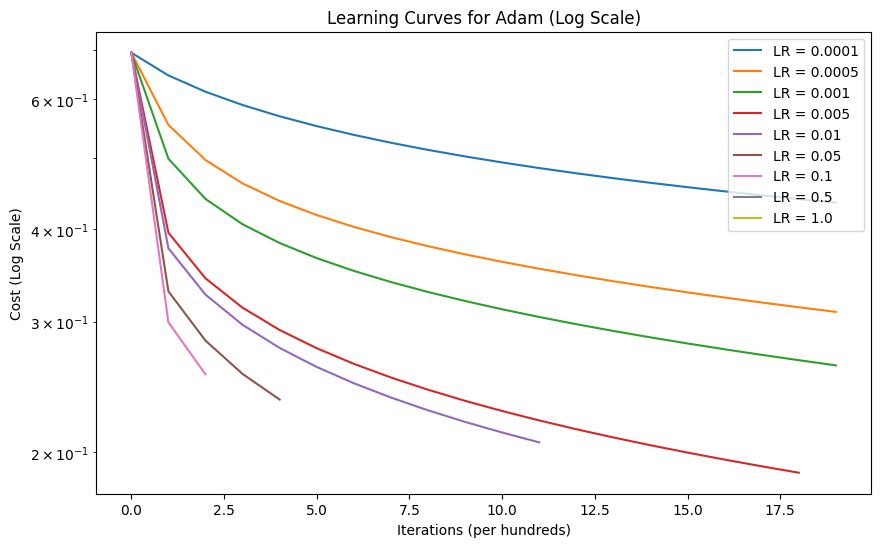

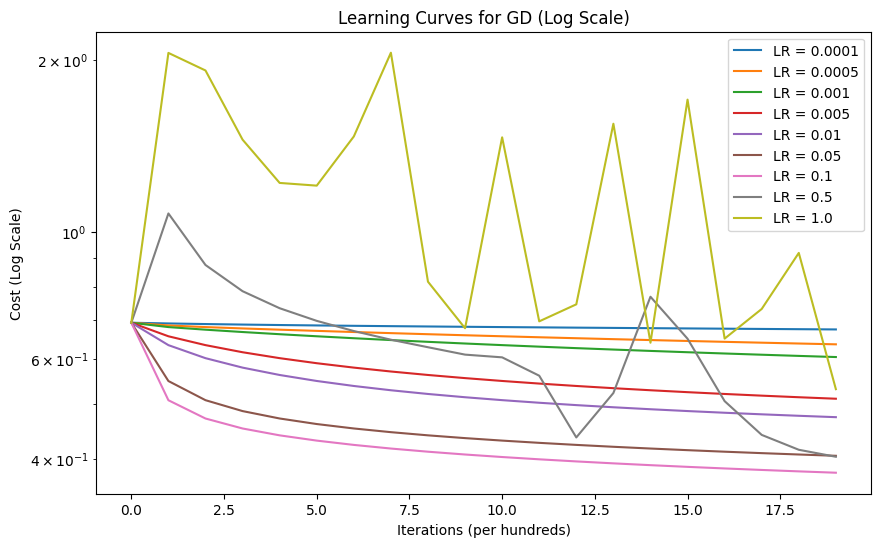

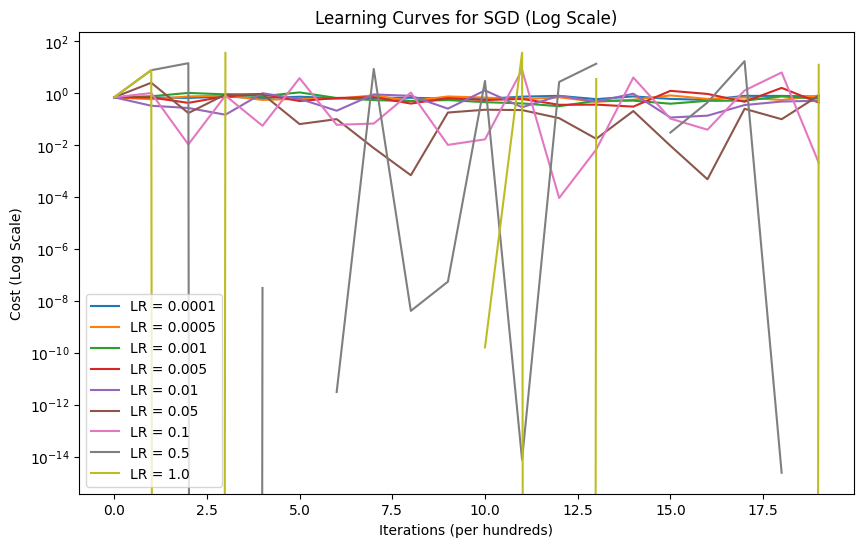

In [43]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
methods_list = ['Adam','GD', 'SGD']

results = {}
accuracies = {}

for method in methods_list:
    results[method] = {}
    accuracies[method] = {}
    for lr in learning_rates:
        print(f"{method} with learning rate of {lr}")
        
        # Train the model and store results
        result = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, method=method, print_cost=False)
        
        # Store costs
        results[method][lr] = result["costs"]
        
        # Calculate and store the accuracy
        train_accuracy = 100 - np.mean(np.abs(result["Y_prediction_train"] - y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(result["Y_prediction_test"] - y_test)) * 100
        accuracies[method][lr] = {"train": train_accuracy, "test": test_accuracy}
        
        print("\n")

# Plot learning curves with a logarithmic scale
for method in methods_list:
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        plt.plot(results[method][lr], label=f"LR = {lr}")
    
    plt.title(f"Learning Curves for {method} (Log Scale)")
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Cost (Log Scale)")
    plt.yscale('log') 
    plt.legend()
    plt.show()

---

### <ins>**Task**</ins>

**Compare the accuracy of the models fitted with various BP algorithms.**

---

In [44]:
for method in methods_list:
    print(f"\n{method} Accuracy Results:")
    for lr in learning_rates:
        print(f"Learning Rate = {lr}: Train Accuracy = {accuracies[method][lr]['train']:0.3f}%, Test Accuracy = {accuracies[method][lr]['test']:0.3f}%")
    print('\n---------------------------------------------------------------------------')


Adam Accuracy Results:
Learning Rate = 0.0001: Train Accuracy = 81.905%, Test Accuracy = 76.119%
Learning Rate = 0.0005: Train Accuracy = 87.593%, Test Accuracy = 76.333%
Learning Rate = 0.001: Train Accuracy = 89.940%, Test Accuracy = 75.586%
Learning Rate = 0.005: Train Accuracy = 94.028%, Test Accuracy = 73.561%
Learning Rate = 0.01: Train Accuracy = 94.525%, Test Accuracy = 72.495%
Learning Rate = 0.05: Train Accuracy = 95.343%, Test Accuracy = 71.002%
Learning Rate = 0.1: Train Accuracy = 95.770%, Test Accuracy = 70.896%
Learning Rate = 0.5: Train Accuracy = 97.298%, Test Accuracy = 69.829%
Learning Rate = 1.0: Train Accuracy = 97.085%, Test Accuracy = 68.977%

---------------------------------------------------------------------------

GD Accuracy Results:
Learning Rate = 0.0001: Train Accuracy = 57.625%, Test Accuracy = 60.661%
Learning Rate = 0.0005: Train Accuracy = 67.757%, Test Accuracy = 69.403%
Learning Rate = 0.001: Train Accuracy = 72.520%, Test Accuracy = 72.708%
Learn